In [86]:
import cv2
import matplotlib.pyplot as plt
from os import listdir, path, makedirs
from os.path import isfile, join
import shutil
import numpy as np

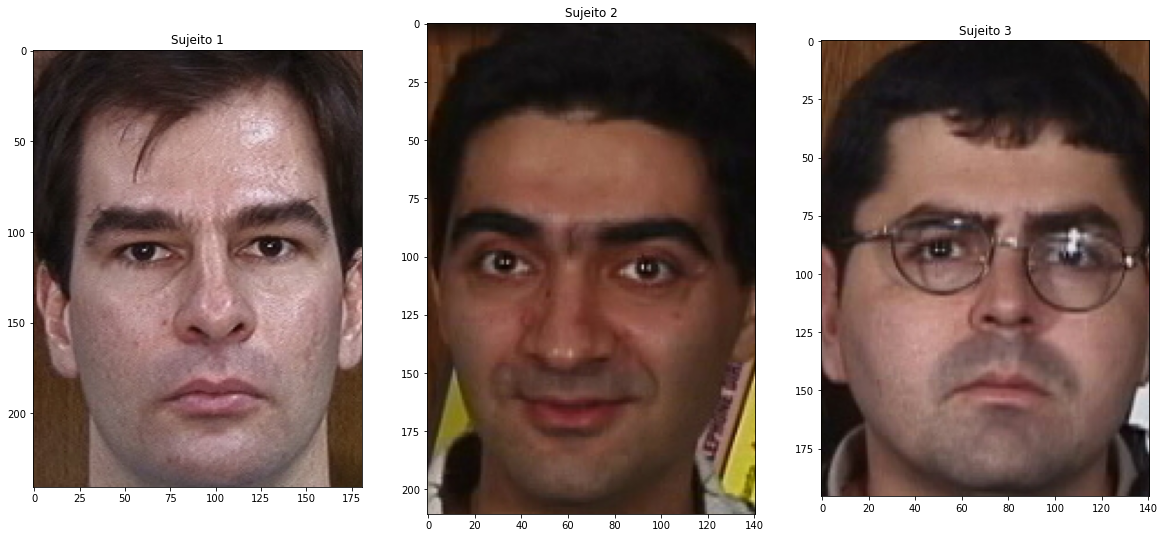

In [87]:
imagem_face_1 = cv2.imread('imagens/cropped_faces/s01_01.jpg')
imagem_face_1 = cv2.cvtColor(imagem_face_1, cv2.COLOR_BGR2RGB)

imagem_face_2 = cv2.imread('imagens/cropped_faces/s02_01.jpg')
imagem_face_2 = cv2.cvtColor(imagem_face_2, cv2.COLOR_BGR2RGB)

imagem_face_3 = cv2.imread('imagens/cropped_faces/s03_01.jpg')
imagem_face_3 = cv2.cvtColor(imagem_face_3, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title('Sujeito 1')
plt.imshow(imagem_face_1)
plt.subplot(132)
plt.title('Sujeito 2')
plt.imshow(imagem_face_2)

plt.subplot(133)
plt.title('Sujeito 3')
plt.imshow(imagem_face_3)


In [88]:
imagem_face_1.shape

(241, 181, 3)

In [89]:
imagem_face_2.shape

(211, 141, 3)

In [90]:
imagem_face_3.shape

(196, 141, 3)

In [91]:
faces_caminho = "imagens/cropped_faces/"
lista_arq_faces = [f for f in listdir(faces_caminho) if isfile(join(faces_caminho,f))]

In [92]:
lista_arq_faces[0]

's01_01.jpg'

In [93]:
len(lista_arq_faces)

750

In [94]:
faces_path_treino = "imagens/treino/"
faces_path_teste = "imagens/teste/"

if not path.exists(faces_path_treino):
    makedirs(faces_path_treino)
    
if not path.exists(faces_path_teste):
    makedirs(faces_path_teste)
    
for arq in lista_arq_faces:
    sujeito = arq[1:3]
    numero = arq[4:6]
    
    if int(numero) <=10:
        shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
    
    else:
        shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)


In [95]:
def padronizar_imagem(imagem_caminho):
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    imagem = cv2.resize(imagem, (200,200), interpolation = cv2.INTER_LANCZOS4)
    return imagem

In [96]:
list_faces_treino = [f for f in listdir(faces_path_treino) if isfile(join(faces_path_treino,f))]
list_faces_teste = [f for f in listdir(faces_path_teste) if isfile(join(faces_path_teste,f))]

In [97]:
list_faces_teste[0]

's01_11.jpg'

In [98]:
list_faces_treino[0]

's01_01.jpg'

In [99]:
dados_treinamento,sujeitos = [],[]
for i, arq in enumerate(list_faces_treino):
    imagem_path = faces_path_treino+arq
    imagem = padronizar_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))

In [100]:
len(dados_treinamento)

500

In [101]:
len(sujeitos)

500

In [102]:
dados_teste, sujeitos_teste = [],[]

In [103]:
dados_teste,sujeitos_teste = [],[]
for i, arq in enumerate(list_faces_teste):
    imagem_path = faces_path_teste+arq
    imagem = padronizar_imagem(imagem_path)
    dados_teste.append(imagem)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))

In [104]:
len(dados_teste)

250

In [105]:
len(sujeitos_teste)

250

Text(0.5, 1.0, '5')

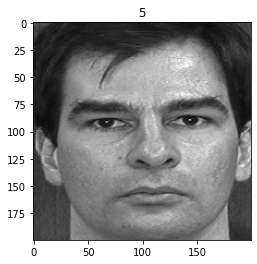

In [106]:
plt.imshow(dados_treinamento[0],cmap='gray')
plt.title(sujeito[0])

Text(0.5, 1.0, '1')

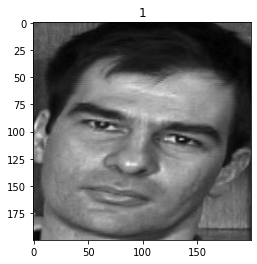

In [107]:
plt.imshow(dados_teste[0],cmap='gray')
plt.title(sujeitos_teste[0])

# Algritmos de classificação de faces

In [108]:
sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos_teste, dtype=np.int32)

In [109]:
modelo_eigenface = cv2.face.EigenFaceRecognizer_create()
modelo_eigenface.train(dados_treinamento, sujeitos)

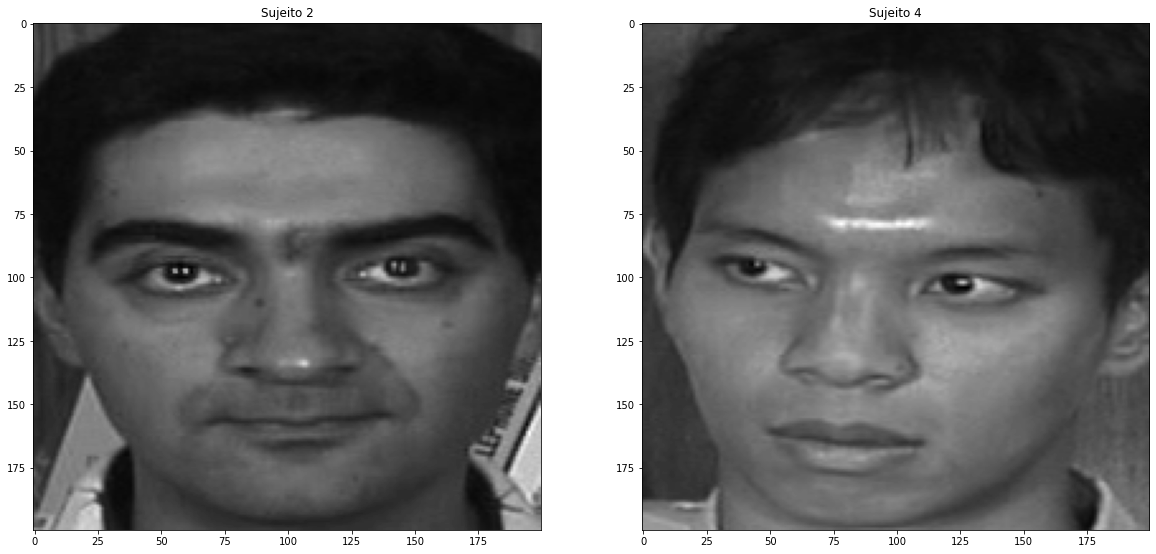

In [110]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title("Sujeito "+str(sujeitos_teste[6]))
plt.imshow(dados_teste[6], cmap='gray')

plt.subplot(122)
plt.title("Sujeito "+str(sujeitos_teste[19]))
plt.imshow(dados_teste[19], cmap='gray')

plt.show()

In [111]:
predicao = modelo_eigenface.predict(dados_teste[19])
predicao

(4, 3120.3973014494786)

# Classificador Fishfaces

In [112]:
modelo_fisherfaces = cv2.face.FisherFaceRecognizer_create()
modelo_fisherfaces.train(dados_treinamento, sujeitos)

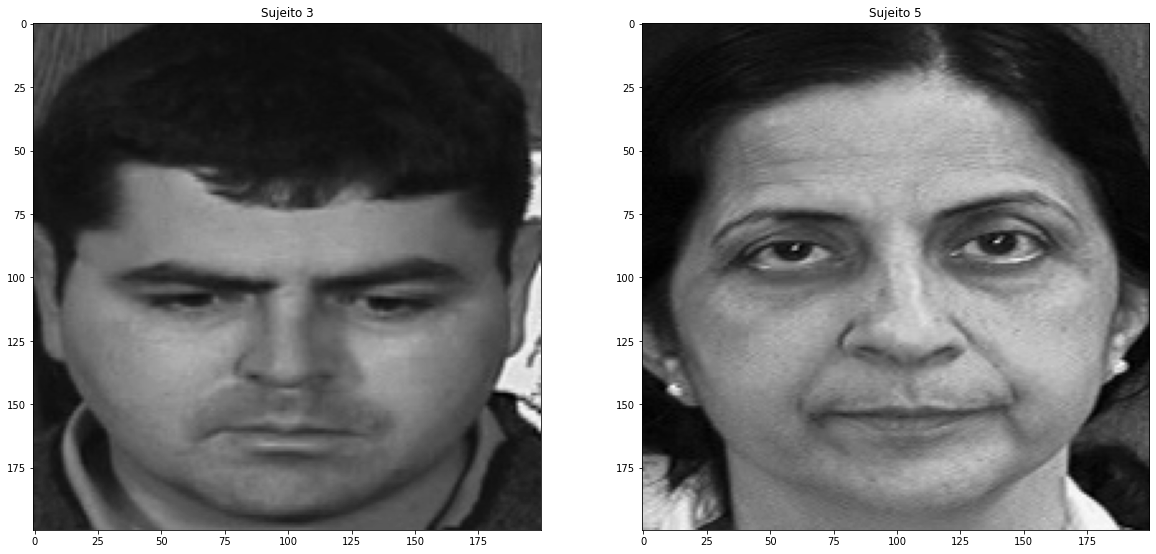

In [113]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title("Sujeito "+str(sujeitos_teste[13]))
plt.imshow(dados_teste[13], cmap='gray')

plt.subplot(122)
plt.title("Sujeito "+str(sujeitos_teste[23]))
plt.imshow(dados_teste[23], cmap='gray')

plt.show()

In [114]:
predicao = modelo_fisherfaces.predict(dados_teste[13])
predicao

(3, 891.027050275648)

In [115]:
predicao = modelo_fisherfaces.predict(dados_teste[23])
predicao

(5, 1186.0034140991759)

# Classificador LBPH

In [116]:
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()
modelo_lbph.train(dados_treinamento, sujeitos)

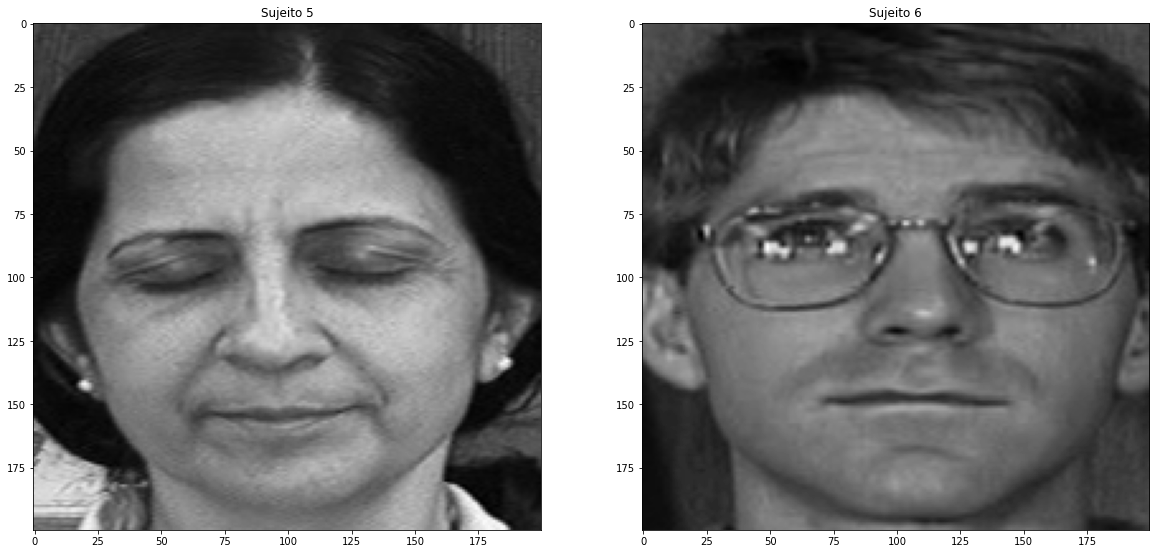

In [117]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title("Sujeito "+str(sujeitos_teste[21]))
plt.imshow(dados_teste[21], cmap='gray')

plt.subplot(122)
plt.title("Sujeito "+str(sujeitos_teste[27]))
plt.imshow(dados_teste[27], cmap='gray')

plt.show()

In [118]:
predicao = modelo_lbph.predict(dados_teste[21])
predicao

(5, 32.938584374874814)

In [119]:
predicao = modelo_lbph.predict(dados_teste[27])
predicao

(6, 36.49919959564635)

# Analise da precisão

In [121]:
from sklearn.metrics import accuracy_score

In [126]:
y_pred_eigenfaces = []
for item in dados_teste:
    y_pred_eigenfaces.append(modelo_eigenface.predict(item)[0])

In [127]:
acuracia_eigen = accuracy_score(sujeitos_teste, y_pred_eigenfaces)
acuracia_eigen

0.728

In [128]:
y_pred_fisher = []
for item in dados_teste:
    y_pred_fisher.append(modelo_fisherfaces.predict(item)[0])
acuracia_fisher = accuracy_score(sujeitos_teste, y_pred_fisher)
acuracia_fisher

0.52

In [130]:
y_pred_lbph = []
for item in dados_teste:
    y_pred_lbph.append(modelo_lbph.predict(item)[0])
acuracia_lbph = accuracy_score(sujeitos_teste, y_pred_lbph)
acuracia_lbph

0.792